In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import random
import itertools

In [2]:
start_date = dt.datetime(2022,1,1)
end_date = dt.datetime(2025,2,24)

symbol_list = ['AAPL', 'MSFT', 'F', 'BAC', 'NKE', 'V', 'DIS']

n_tickers_selected = 4
n_combinations=20

list(itertools.combinations(symbol_list, n_tickers_selected))
sampled_combinations= random.sample(list(itertools.combinations(symbol_list, n_tickers_selected)),n_combinations) 

In [3]:
all_portfolios = []


risk_free_rate = 0.0415

for combination in sampled_combinations:
    data = yf.download(list(combination), start= start_date, end = end_date, progress= False)["Close"]
    #print(data.head())
    returns = data.pct_change().dropna()
    #print(returns.head())
    covariance_matrix = returns.cov()
    #print(covariance_matrix)

    annual_returns = returns.mean() * 252
    annual_cov = covariance_matrix * 252

    # Numero de simulaciones de ponderaciones
    num_portafolios = 10000

    weights_array = np.zeros((num_portafolios, n_tickers_selected))
    returns_array = np.zeros(num_portafolios)
    risk_array = np.zeros(num_portafolios)
    sharpe_array = np.zeros(num_portafolios)

    for i in range(num_portafolios):
        # generas los pesos aleatorios para cada portafolio
        weights_array[i] = np.random.random(n_tickers_selected)
        weights_array[i] = weights_array[i] / np.sum(weights_array[i])

        # obteniendo rendimiento y volatilidad esperada anual por portafolio
        portfolio_return = np.dot(annual_returns, weights_array[i])
        portfolio_risk = np.sqrt(np.dot(weights_array[i].T, np.dot(annual_cov, weights_array[i])))
        
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk

        # guardando historicos
        weights_array[i, :] = weights_array[i]
        returns_array[i] = portfolio_return
        risk_array[i] = portfolio_risk
        sharpe_array[i] = sharpe_ratio


    #print(returns_array)
    #print(risk_array)
    portfolios = pd.DataFrame({
        "Returns": returns_array,
        "Risk": risk_array,
        "Sharpe Ratio": sharpe_array
        
    })


    for i, symbol in enumerate(combination):
        portfolios[symbol + " Weight"] = weights_array[:, i]

    all_portfolios.append(portfolios)




YF.download() has changed argument auto_adjust default to True


#### Gráficas


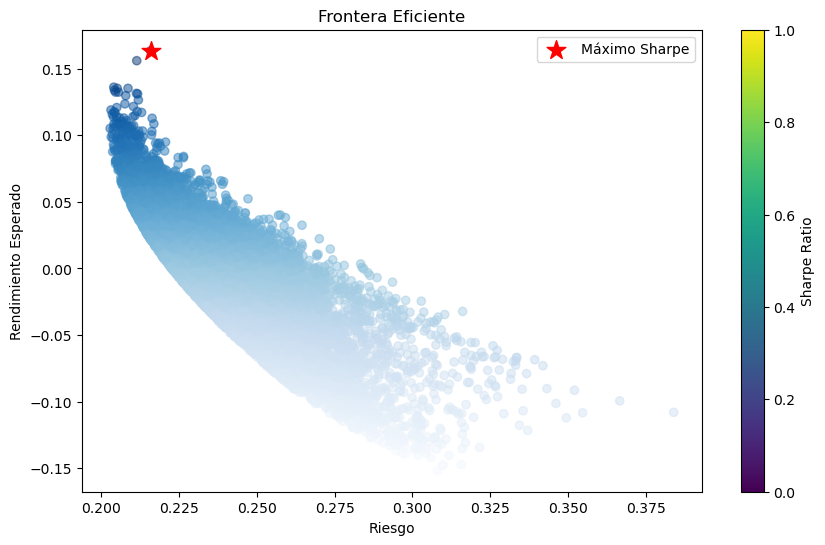

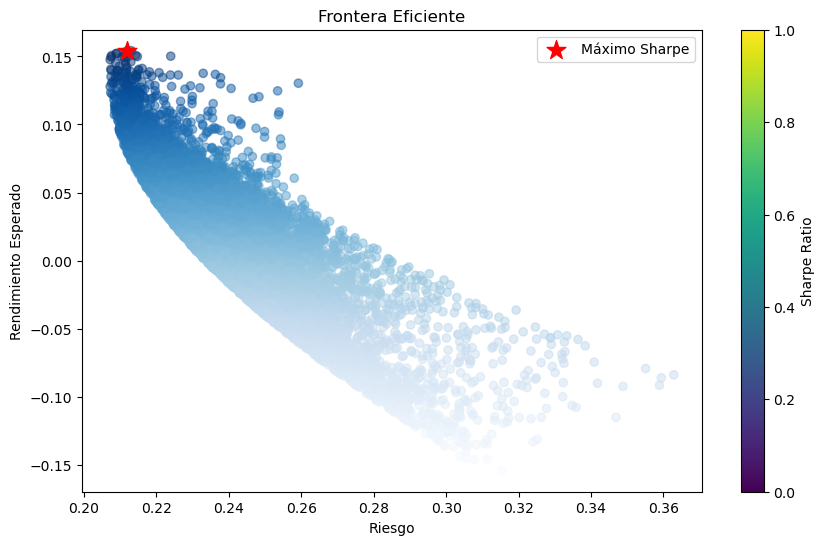

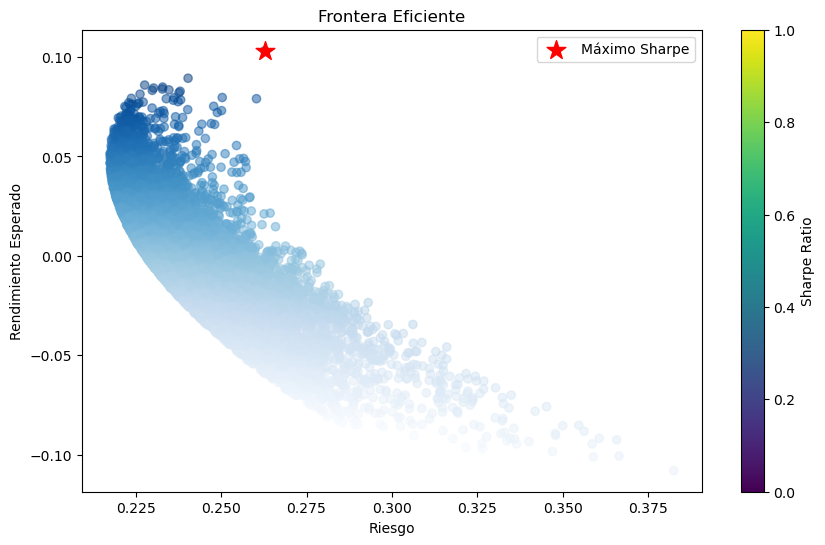

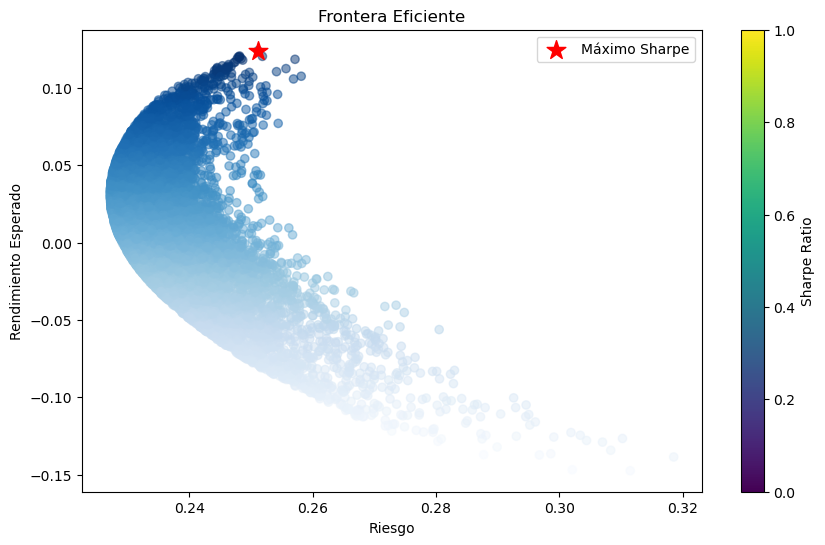

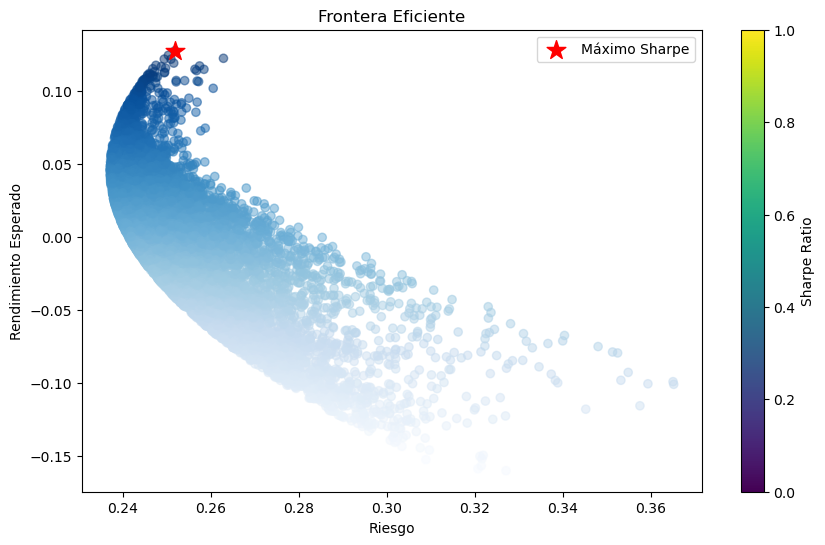

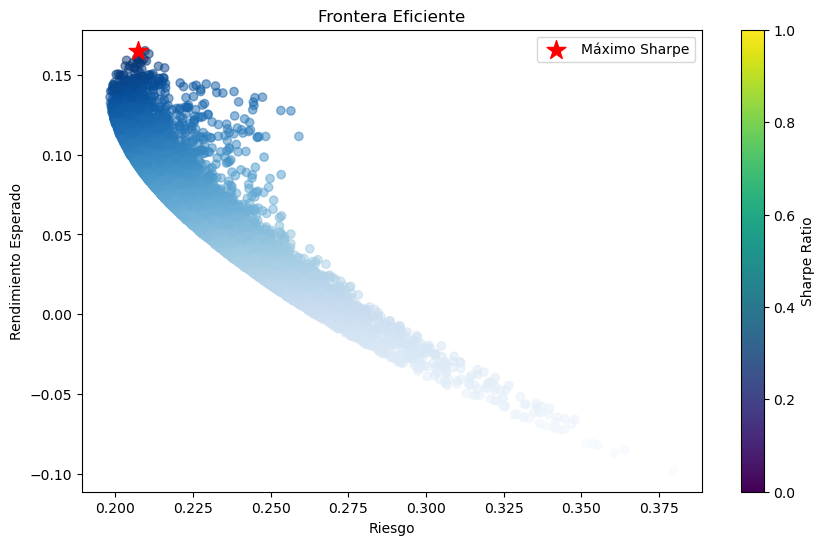

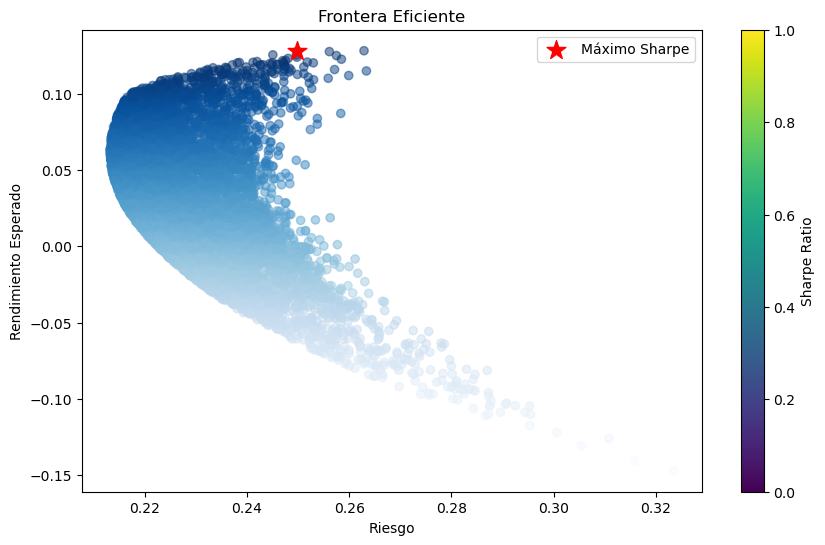

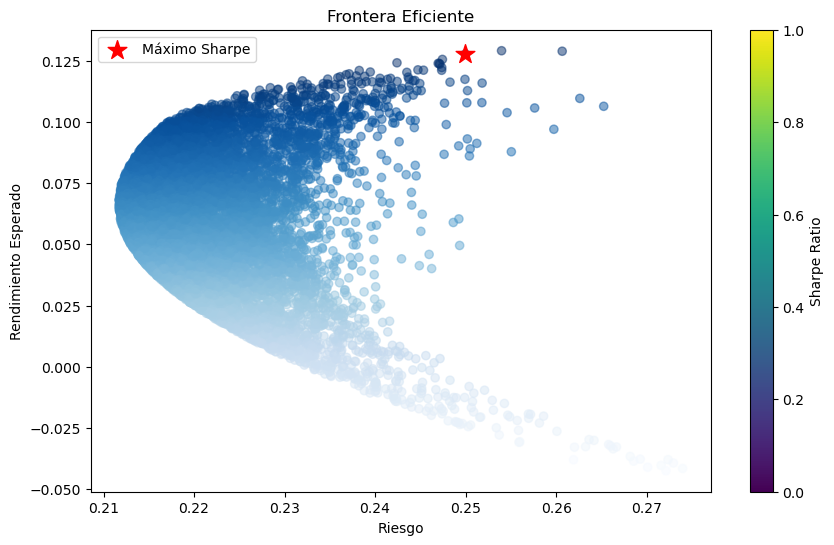

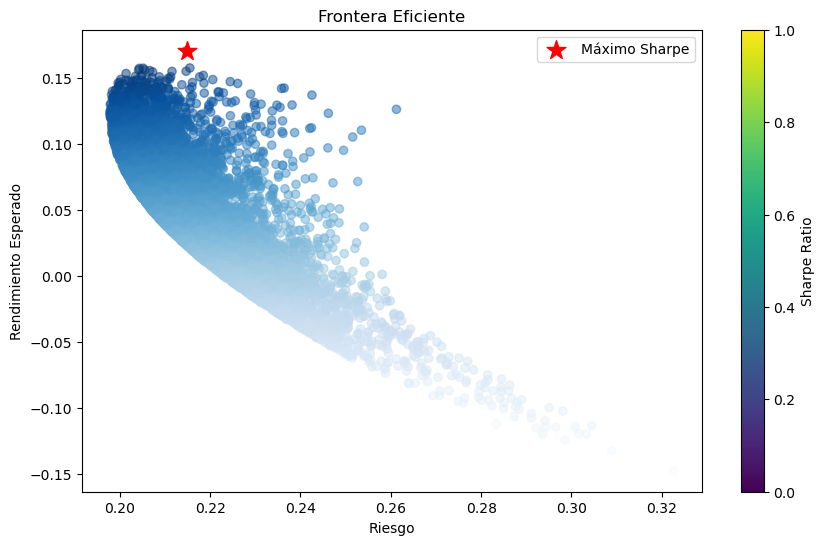

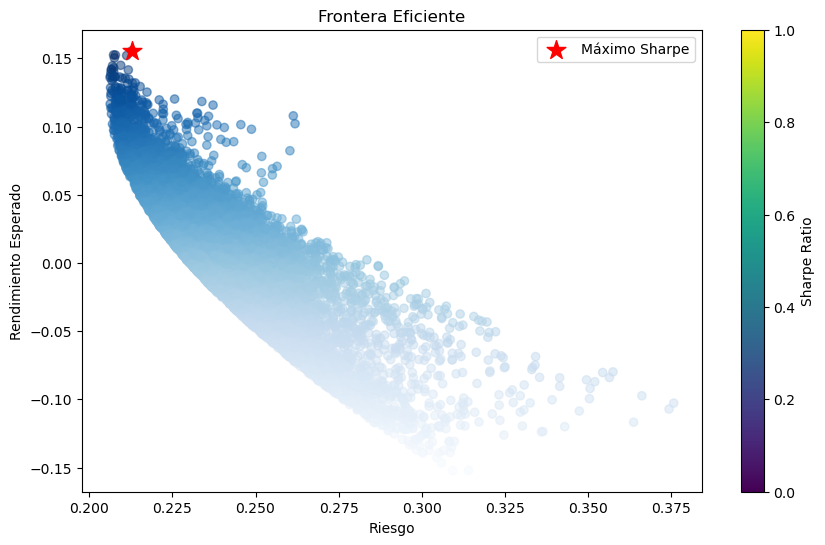

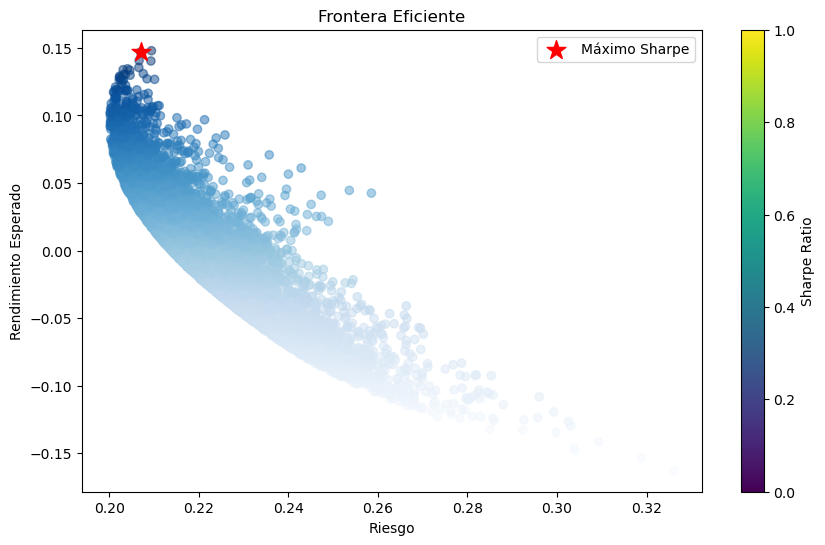

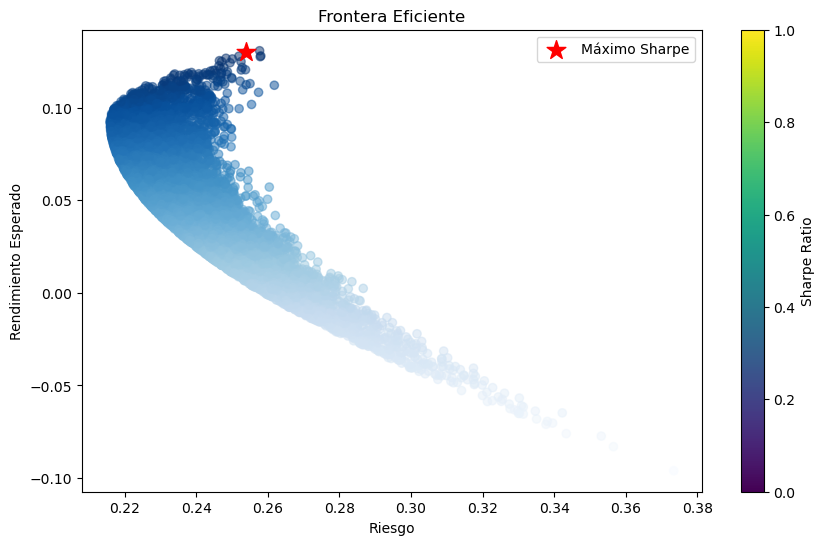

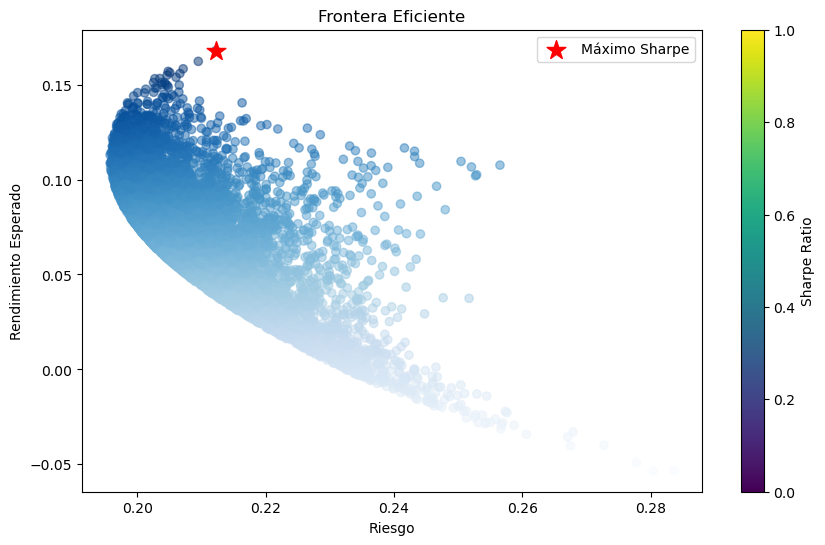

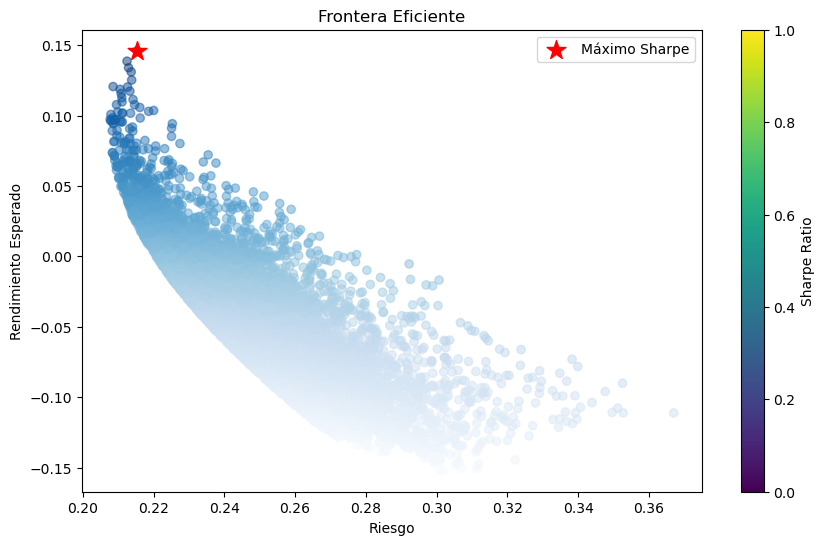

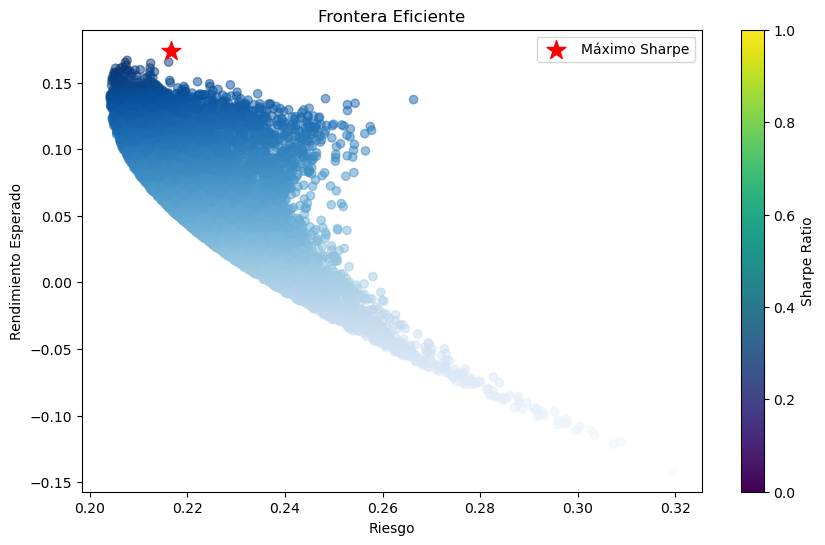

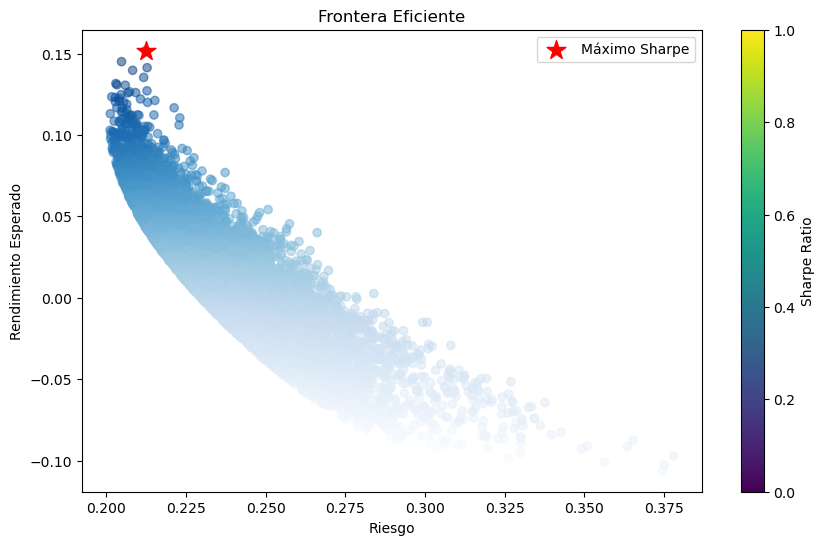

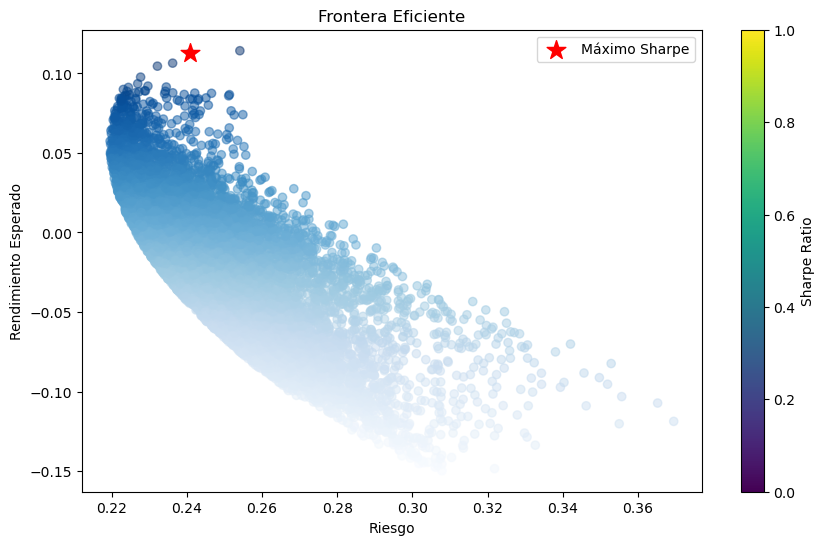

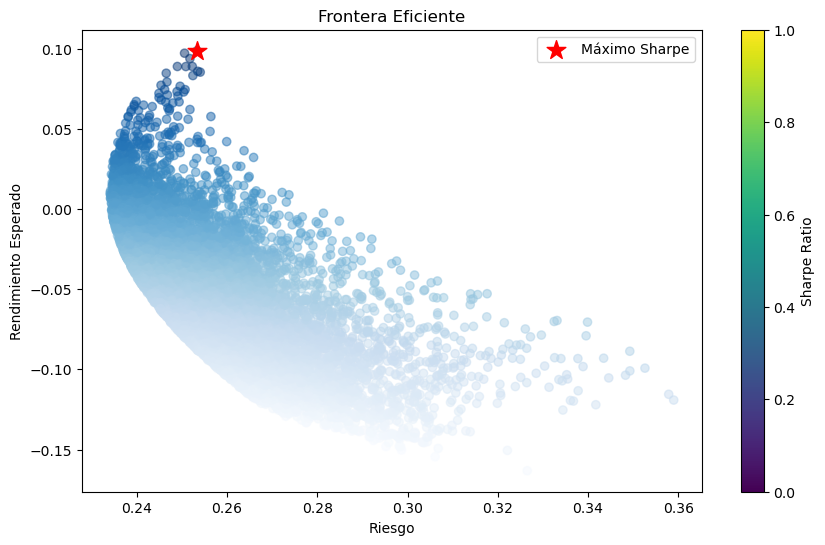

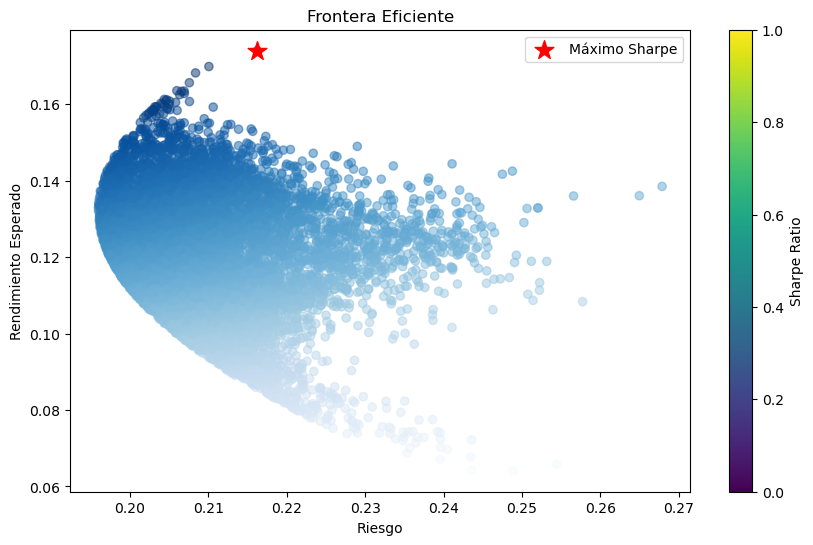

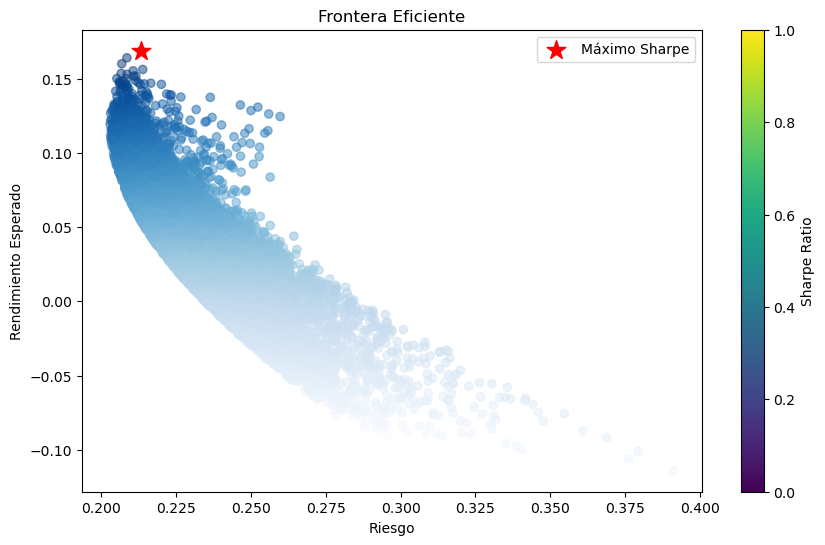

In [4]:
for i, portfolios in enumerate(all_portfolios):
    
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolios["Risk"], portfolios["Returns"], c=portfolios["Sharpe Ratio"], cmap="Blues", alpha=0.5)
    max_sharpe = portfolios["Sharpe Ratio"].idxmax()
    max_sharpe_portfolio = portfolios.loc[max_sharpe]
    plt.scatter(max_sharpe_portfolio["Risk"], max_sharpe_portfolio["Returns"], color="red", marker="*", s=200, label="Máximo Sharpe")
    
    plt.xlabel("Riesgo")
    plt.ylabel("Rendimiento Esperado")
    plt.title(f"Frontera Eficiente")
    plt.colorbar(label="Sharpe Ratio")
    plt.legend()
    plt.show()


#### Top 10

In [5]:
all_portfolios_df = pd.concat(all_portfolios)
all_portfolios_df2 = all_portfolios_df.fillna(0)
all_portfolios_10 = all_portfolios_df2.nlargest(10, 'Sharpe Ratio')
all_portfolios_10

,Returns,Risk,Sharpe Ratio,F Weight,BAC Weight,NKE Weight,V Weight,AAPL Weight,MSFT Weight,DIS Weight
6589,0.174042,0.216225,0.612983,0.000000,0.019112,0.000000,0.962017,0.004043,0.014828,0.000000
1254,0.169910,0.210054,0.611322,0.000000,0.005040,0.000000,0.853632,0.123058,0.018271,0.000000
983,0.173875,0.216707,0.610846,0.000000,0.000000,0.004723,0.964118,0.010162,0.020998,0.000000
3512,0.168232,0.208351,0.608260,0.000000,0.020524,0.000000,0.783436,0.195178,0.000862,0.000000
8444,0.166676,0.207655,0.602809,0.000000,0.000000,0.001343,0.791899,0.131093,0.075665,0.000000
5325,0.170270,0.214766,0.599582,0.000000,0.025437,0.008216,0.940449,0.025898,0.000000,0.000000
736,0.165673,0.207564,0.598238,0.000000,0.010086,0.000000,0.720683,0.263685,0.005545,0.000000
5024,0.168918,0.213309,0.597340,0.003411,0.000000,0.000000,0.015401,0.077934,0.000000,0.903254
3238,0.165043,0.207304,0.595950,0.000000,0.000000,0.001637,0.787781,0.085522,0.125061,0.000000
9197,0.167830,0.212244,0.595209,0.000000,0.009144,0.000000,0.048116,0.000000,0.032258,0.910482
